In [54]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample data (replace this with your own DataFrame or data)
df = pd.read_csv(r'C:\Users\acer\Dropbox\PC\Downloads\processed_data.csv')

In [55]:
# Combine text from multiple columns into a single Series
combined_text = df['self_text'] + df['post_title']

# Replace NaN values with an empty string
combined_text_cleaned = combined_text.fillna('')

In [99]:
import scipy.sparse

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [100]:
# Fit the vectorizer to the documents and transform them into TF-IDF features
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_text_cleaned)

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

In [58]:
# Function to get top N words for each document
def get_top_words(matrix_row, feature_names, top_n=10):
    sorted_indices = matrix_row.argsort()[::-1]
    top_words_indices = sorted_indices[:top_n]
    top_words = [feature_names[i] for i in top_words_indices]
    return top_words

In [61]:
# Get top 5 words for each document
top_words_per_doc = [get_top_words(row.toarray().flatten(), feature_names, top_n=7) for row in tfidf_matrix]

In [ ]:
# Display top words for each document
for i, top_words in enumerate(top_words_per_doc):
    print(f"Document {i+1}: {top_words}")

In [44]:
df['top_words_per_doc'] = top_words_per_doc

In [45]:
df.to_csv('tfidf_dataset.csv', index=False)

In [101]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics

# Initialize k-means clustering
num_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

In [102]:
# Fit k-means to the TF-IDF vectors
kmeans.fit(tfidf_matrix)

# Print the top terms per cluster
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = feature_names
for i in range(num_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :5]:
        print(' %s' % terms[ind]),
    print()

Top terms per cluster:
Cluster 0:
 drone
 fpv
 russian
 soldier
 ukrainian

Cluster 1:
 ukrain
 russia
 war
 us
 say

Cluster 2:
 russian
 ukrainian
 pov
 russia
 ukrain



In [103]:
from sklearn.decomposition import PCA

# Perform dimensionality reduction using PCA with the 'arpack' solver
pca = PCA(n_components=2, svd_solver='arpack')                        # Reduce to 2 dimensions for visualization
tfidf_pca = pca.fit_transform(tfidf_matrix)

# Get cluster labels
labels = kmeans.labels_

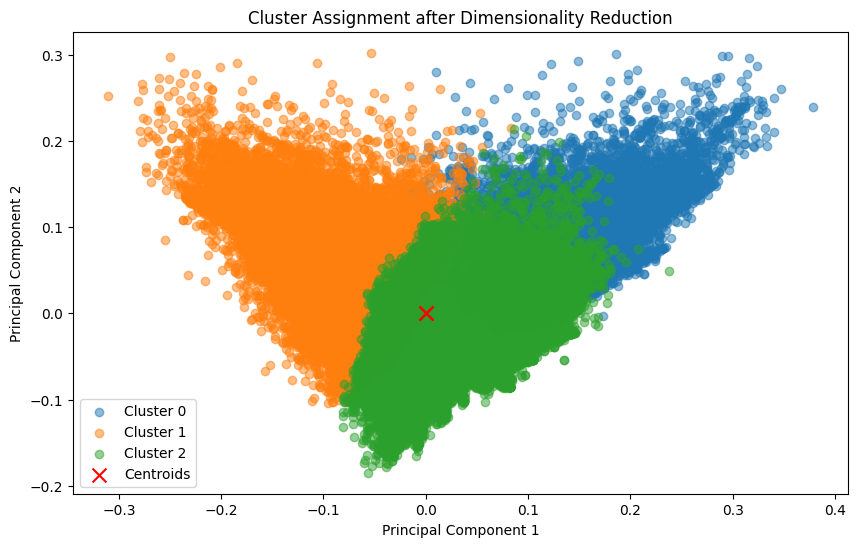

In [104]:
# Visualize cluster assignment after dimensionality reduction
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(tfidf_pca[labels == i, 0], tfidf_pca[labels == i, 1], label=f'Cluster {i}', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, color='red', label='Centroids')
plt.title('Cluster Assignment after Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()